# Lab 9 Task 1
Хаю-хай, товарищи.

Здесь немного другой формат решил использовать, поскольку кластеризация на моём ноуте очень медленно идёт, и я не хочу каждый раз перезапускать всю прогу.

Внимательно следите, в клетках где print - выводятся ответы которые нужно вставлять. Остальное - игнорьте.

Запускайте блокнот в Google Colab, иначе некоторые числа могут не совпадать.

In [79]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [80]:
random_state = 41

(_,_), (x, y) = mnist.load_data()

x = np.array([i.flatten() for i in x])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

In [81]:
km = KMeans(random_state=random_state, n_clusters=10)
km.fit(x_train, y_train)
print('1.1:', len([i for i in km.labels_ if i == 9]))

c:\Users\dmitr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1.1: 959


In [82]:
df = pd.DataFrame({'cluster_label': km.labels_, 'true_label': y_train})
df = df.groupby('cluster_label')['true_label'].value_counts().rename('count').reset_index()

labels = []

for i in range(10):
    labels.append(df[df['cluster_label'] == i].head(1)['true_label'].values[0])

print('1.2:', ', '.join([str(i) for i in labels]))

1.2: 2, 8, 1, 6, 4, 5, 7, 1, 0, 3


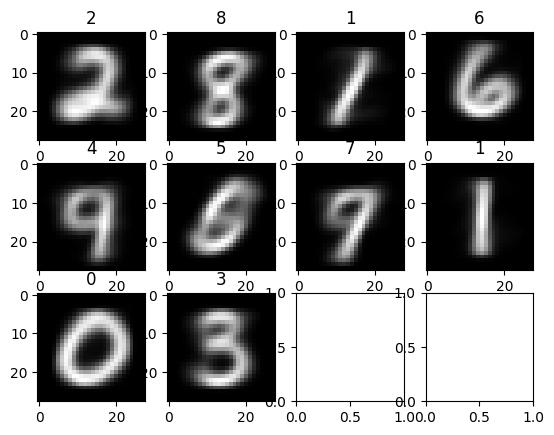

In [83]:
fig, axs = plt.subplots(3, 4)
for i, ax in enumerate(axs.flat[:10]):
    ax.imshow(km.cluster_centers_[i].reshape((28, 28)), cmap='gray')
    ax.set_title(labels[i])

In [84]:
print('1.3:', accuracy_score(y_train, [labels[i] for i in km.labels_]))

1.3: 0.596


In [85]:
y_pred = km.predict(x_test)
print('1.4:', accuracy_score(y_test, [labels[i] for i in y_pred]))

print('1.5:', confusion_matrix(y_test, [labels[i] for i in y_pred])[9].argmax())

1.4: 0.602
1.5: 4


In [86]:
tsne = TSNE(n_components=2, init='random', random_state=random_state)
x_train_embedded = tsne.fit_transform(x_train)

In [94]:
km = KMeans(n_clusters=10, random_state=random_state)
km.fit(x_train_embedded, y_train)
df = pd.DataFrame({'cluster_label': km.labels_, 'true_label': y_train})
df = df.groupby('cluster_label')['true_label'].value_counts().rename('count').reset_index()

labels = []

for i in range(10):
    labels.append(df[df['cluster_label'] == i].head(1)['true_label'].values[0])

print('1.6:', accuracy_score(y_train, [labels[i] for i in km.labels_]))

c:\Users\dmitr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1.6: 0.836125
